In [117]:
import numpy as np

In [118]:
eta = 0.1
theta = np.array([0.1, 0.1])
x = np.array([1.0, 0.5])
y = np.array([0])

In [119]:
def compute_z(theta, x):
    return np.dot(x, theta)
def logistic_func(z):
    return 1/(1 + np.exp(-z))
def predict(theta, x):
    z = compute_z(theta, x)
    y_hat = logistic_func(z)
    return z, y_hat
def compute_loss(y_hat, y):
    return np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
def compute_gradient(x, y_hat, y):
    return np.dot(x.T, (y_hat - y)) / len(y)

def update_weight(theta, lr, gradient):
    theta = theta - lr * gradient
    return theta

### N Sample

In [120]:
X = np.array([
    [1.0, 0.5],
    [2.0, 1.0],
    [3.0, 1.5],
    [2.0, 2.0],
    [1.0, 2.5],
    [2.0, 3.0],
    [1.0, 3.5],
    [2.0, 4.0],
])
Y = np.array([0, 0, 1, 0, 0, 1, 1, 1])

hàm hstack (horizontal stack) được sử dụng để ghép (hay xếp) các mảng (array) theo chiều ngang, tức là ghép các mảng dọc theo trục 1 (trục cột).

In [121]:
n_samples = X.shape[0]
ones = np.ones((n_samples, 1))

In [122]:
X = np.hstack([np.ones((n_samples, 1)), X])
X

array([[1. , 1. , 0.5],
       [1. , 2. , 1. ],
       [1. , 3. , 1.5],
       [1. , 2. , 2. ],
       [1. , 1. , 2.5],
       [1. , 2. , 3. ],
       [1. , 1. , 3.5],
       [1. , 2. , 4. ]])

In [123]:
n_features = X.shape[-1]
theta = np.random.rand(n_features)
theta

array([0.70781058, 0.36508866, 0.68685779])

In [124]:
n_epochs = 10
lr = 0.001

losses = []
for epoch in range(n_epochs):
    epoch_loss = []
    # predict y_hat
    z, y_hat = predict(theta, X)

    # compute loss
    loss = compute_loss(y_hat, Y)
    epoch_loss.append(loss)

    # compute gradient
    gradient = compute_gradient(X, y_hat, Y)

    # update weights
    theta = update_weight(theta, lr, gradient)
    losses.append(sum(epoch_loss) / len(epoch_loss))

losses

[1.2154274015438808,
 1.2144065451337591,
 1.2133865127722727,
 1.2123673059764628,
 1.2113489262633388,
 1.2103313751498606,
 1.2093146541529205,
 1.2082987647893224,
 1.2072837085757675,
 1.2062694870288297]

### Classification

In [125]:
import pandas as pd

In [126]:
data = pd.read_csv("./data.csv")
data.head()

,Width,Length,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Width   100 non-null    float64
 1   Length  100 non-null    float64
 2   Result  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [128]:
X = data[['Width', 'Length']]
Y = data['Result']
X.shape, Y.shape

((100, 2), (100,))

In [129]:
X = np.hstack([np.ones((X.shape[0], 1)), X])
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [130]:
n_features = X.shape[-1]
theta = np.array([0.66522587, 0.69048314, 0.2134033])

In [131]:
n_epochs = 100
lr = 0.001

losses = []
for epoch in range(n_epochs):
    # predict y_hat
    z, y_hat = predict(theta, X)

    # compute loss
    loss = compute_loss(y_hat, Y)
    losses.append(loss)

    # compute gradient
    gradient = compute_gradient(X, y_hat, Y)

    # update weights
    theta = update_weight(theta, lr, gradient)

theta, losses

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3823026528.py:10: RuntimeWarning: divide by zero encountered in log
  return np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3823026528.py:10: RuntimeWarning: divide by zero encountered in log
  return np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3823026528.py:10: RuntimeWarning: divide by zero encountered in log
  return np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3823026528.py:10: RuntimeWarning: divide by zero encountered in log
  return np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3823026528.py:10: RuntimeWarning: divide by zero encountered in log
  return np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3823026528.py:10: RuntimeWarning: div

(array([ 0.65132501,  0.01145603, -0.00992223]),
 [inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  6.550063657834673,
  5.642374924717428,
  4.761680002153897,
  3.9726129691546914,
  3.3221342951672113,
  2.844014188380582,
  2.531125429492443,
  2.3517172528965604,
  2.2590804582139397,
  2.2078839749615837,
  2.1696057471636583,
  2.1342230251583305,
  2.0994367242815093,
  2.064831419351691,
  2.0303438759636268,
  1.99596901376057,
  1.9617109304033122,
  1.9275753721550717,
  1.8935686592485856,
  1.8596975626027423,
  1.8259693159284711,
  1.7923916481256668,
  1.758972820560453,
  1.7257216674508442,
  1.6926476391781302,
  1.65976084868371,
  1.627072121007997,
  1.594593046056881,
  1.562336034610441,
  1.5303143775288113,
  1.498542308023284,
  1.467035066745596,
  1.4358089692989122,
  1.4048814755848176,
  1.3742712601573546,
  1.3439982824508387,
  1.3140838553744123,
  1.2845507103033296,
  1.2554230559427932,
  1.2267266

In [132]:
theta

array([ 0.65132501,  0.01145603, -0.00992223])

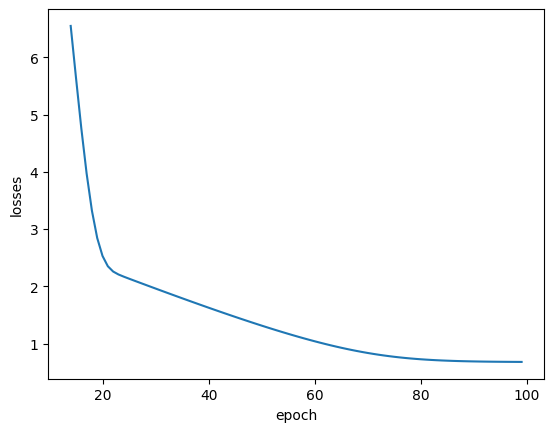

In [133]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [134]:
z, Y_preds = predict(theta, X)

In [135]:
thresholds = [0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
accs = []

for thresh in thresholds:
    Y_pred_ths = []
    for y_hat in Y_preds:
        if float(y_hat) < thresh:
            Y_pred_ths.append(0)
        else:
            Y_pred_ths.append(1)
    
    Y_pred_ths = np.array(Y_pred_ths)
    accs.append(sum(Y_pred_ths == Y) / len(Y_pred_ths))

print(accs)

[0.6, 0.6, 0.61, 0.61, 0.58, 0.47, 0.43, 0.4]
